In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [4]:
uber_data = pd.read_csv('D:/Projects/Uber EDA/My Uber Drives - 2016.csv')

In [5]:
uber_data.head()

START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit

In [6]:
# print the number of null (missing) values in each column of a DataFrame
# remove rows with missing (NaN) values from the DataFrame

print(uber_data.isnull().sum())
uber_data = uber_data.dropna()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [8]:
# making string as datetime to identify individual components easily

uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'], format = "%m/%d/%Y %H:%M")
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'], format = "%m/%d/%Y %H:%M")

uber_data['HOUR'] = [x.hour for x in uber_data['START_DATE*']]
uber_data['DAY'] = [x.day for x in uber_data['START_DATE*']]
uber_data['MONTH'] = [x.month for x in uber_data['START_DATE*']]
uber_data['WEEKDAY'] = [calendar.day_name[x.dayofweek] for x in uber_data['START_DATE*']]
uber_data['DAY_OF_WEEK'] = [x.dayofweek for x in uber_data['START_DATE*']]

In [9]:
uber_data.head()

START_DATE*           END_DATE* CATEGORY*           START*  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

             STOP*  MILES*         PURPOSE*  HOUR  DAY  MONTH    WEEKDAY  \
0      Fort Pierce     5.1   Meal/Entertain    21    1      1     Friday   
2      Fort Pierce     4.8  Errand/Supplies    20    2      1   Saturday   
3      Fort Pierce     4.7          Meeting    17    5      1    Tuesday   
4  West Palm Beach    63.7   Customer Visit    14    6      1  Wednesday   
5  West Palm Beach     4.3   Meal/Entertain    17    6      1  Wednesday   

   DAY_OF_WEEK  
0            4  
2            5  
3            1  
4            2  
5            2

<Axes: xlabel='CATEGORY*', ylabel='count'>

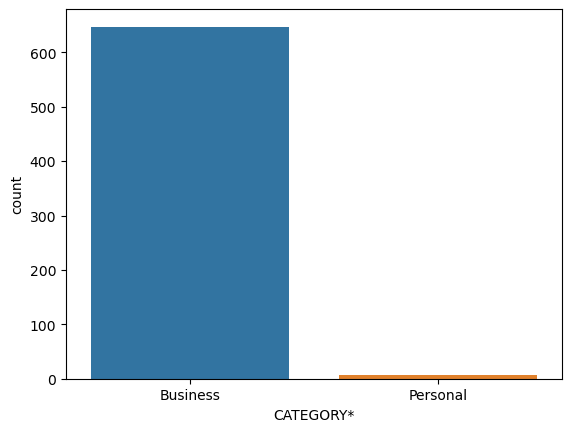

In [10]:
# check which category of people are buying
sns.countplot(x='CATEGORY*', data = uber_data)

<Axes: xlabel='count', ylabel='PURPOSE*'>

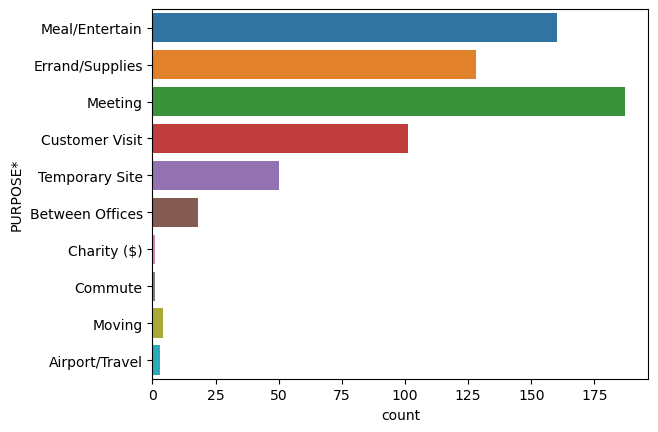

In [11]:
sns.countplot(y='PURPOSE*', data = uber_data)

Using these two graphs, it is clear that users most used Uber for work-related meetings and meals most of the time. Other significant purposes include errands and customer visits. It can be presumed that the user works in a client-oriented service industry that involves frequent traveling and dining with clients in the city.

Plotting the distance column as a histogram shows that the distances traveled by the user are relatively short, which validates my assumption about the user’s work-related travels.

<Axes: ylabel='Frequency'>

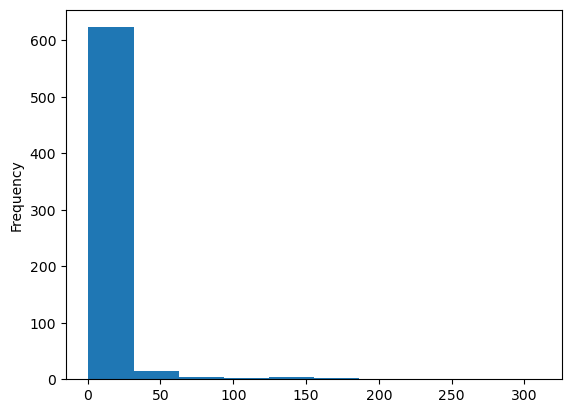

In [12]:
uber_data['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of trips Vs hours')

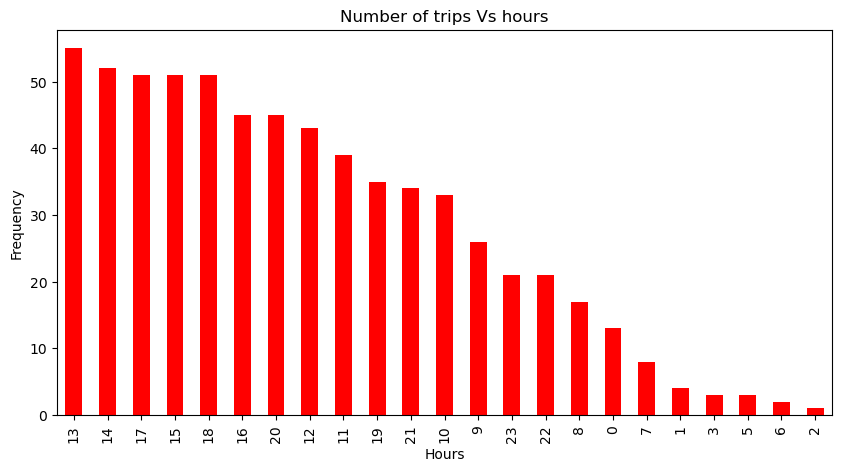

In [13]:
# Next, let us see at what time of the day the user rides an Uber the most.

hours = uber_data['HOUR'].value_counts()
hours.plot(kind='bar', color='red', figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

It is very apparent here that the user travels during lunch hours and in the early evenings more than the rest of the day. It might be, so that client visits or client lunches occur more frequently between 1 PM to 5 PM than the rest of the day.

Text(0.5, 1.0, 'Number of trips Vs days')

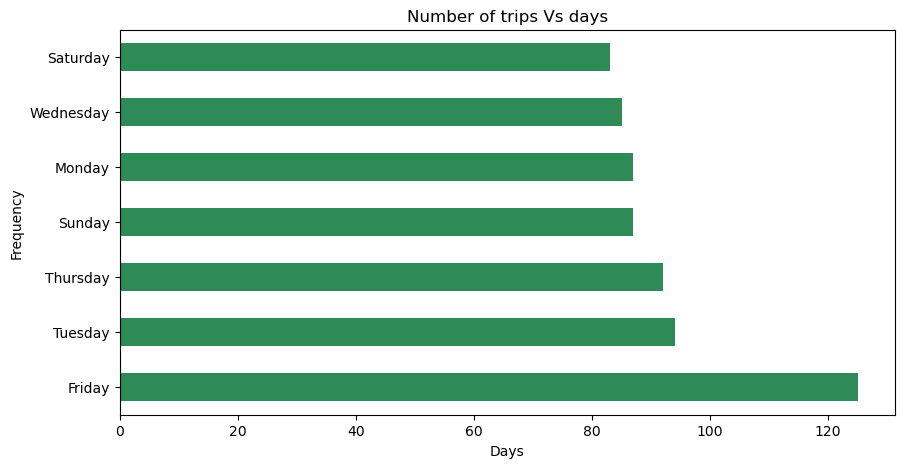

In [14]:
days = uber_data['WEEKDAY'].value_counts()
days.plot(kind='barh', color='seagreen', figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Number of trips Vs days')

While the user travels almost regularly each day of the week, he travels more on Fridays. Since It can be seen that he travels in the evenings too, I can assume that the additional number of trips on Fridays might be recreational.

In [15]:
#month-wise distribution of Uber trips

months = uber_data['MONTH'].value_counts()
months.plot(kind='barh', color='darkblue', figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trips Vs months')

Text(0.5, 1.0, 'Number of trips Vs months')

There were significantly more trips in December 2016 for this user while the rest of the months fall within a specific range.

Text(0.5, 1.0, 'Number of trips Vs days of december')

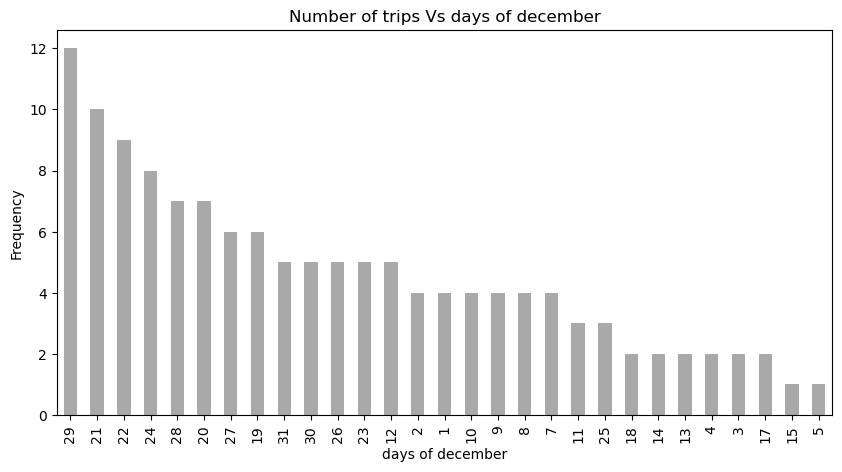

In [17]:
#Let’s see on which days of December the user traveled in an Uber:

months = uber_data['DAY'][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar', color='darkgray', figsize=(10,5))
plt.xlabel('days of december')
plt.ylabel('Frequency')
plt.title('Number of trips Vs days of december')

As expected, the user traveled a lot during the Christmas break. And it is safe to assume that these trips were part of the trips taken during the holiday season.

Text(0.5, 1.0, 'Pickup point Vs Frequency')

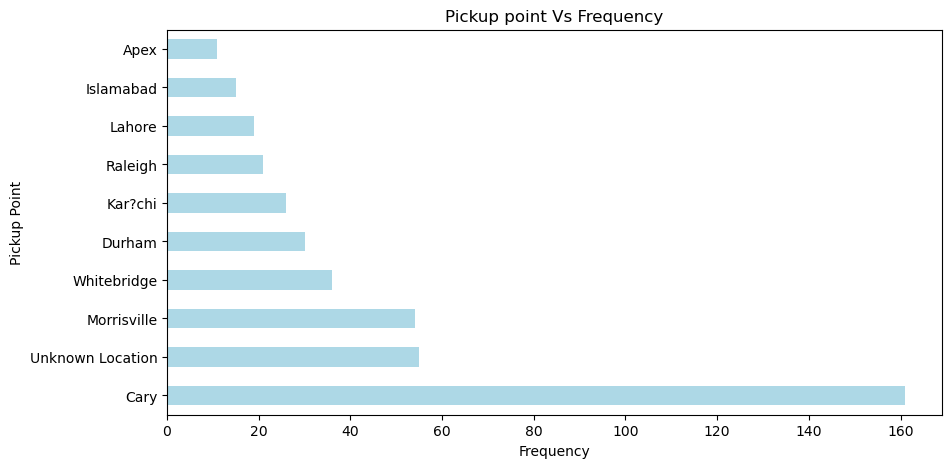

In [18]:
# Now, taking a different direction, let’s see where the user traveled to and from in an Uber.

months = uber_data['START*'].value_counts().nlargest(10)
months.plot(kind='barh', color='lightblue', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup Point')
plt.title('Pickup point Vs Frequency')


Text(0.5, 1.0, 'End point Vs Frequency')

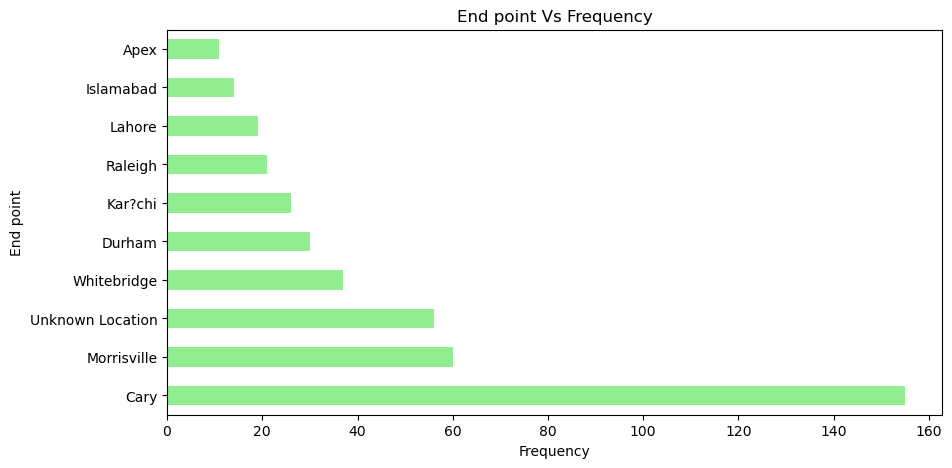

In [19]:
# Similarly, let’s also look at the destination of these trips.

months = uber_data['STOP*'].value_counts().nlargest(10)
months.plot(kind='barh', color='lightgreen', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('End point')
plt.title('End point Vs Frequency')

An interesting observation is how most of these places are the same as the pick-up points. This confirms the intuition that the user usually commutes around Cary or Morrisville.

Text(0.5, 1.0, 'Trips Vs Frequency')

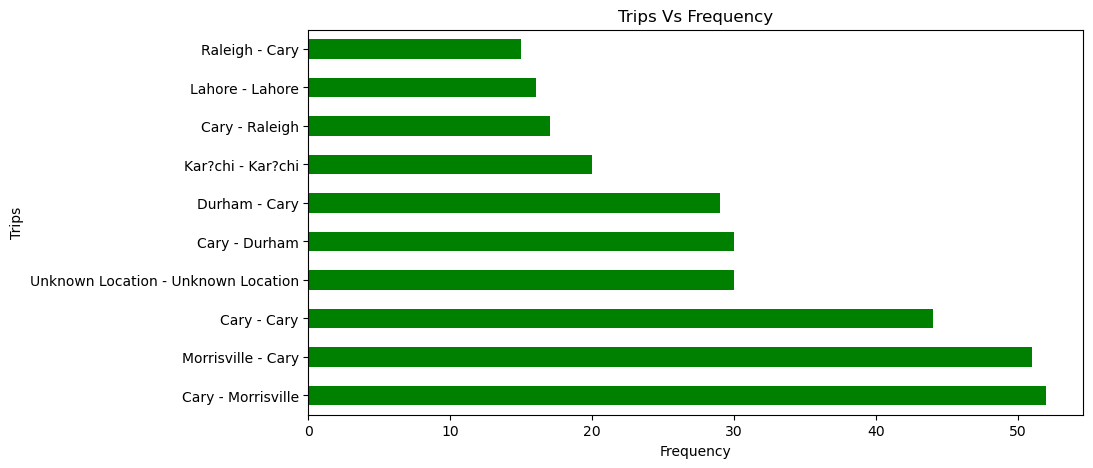

In [26]:
# checking how often the user takes particular “trips” from location A to B.

months = (uber_data['START*'] + ' - ' + uber_data['STOP*']).value_counts().nlargest(10)

months.plot(kind='barh', color='green', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Trips')
plt.title('Trips Vs Frequency')


As deduced, the user travels very frequently between Cary and Morrisville.